<a href="https://colab.research.google.com/github/nasirza/Portfolio/blob/main/article_market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Market segmentation / Customer Clustering / Social Stratification

## (Clustering Credit-Fearful Households in the United States Based on Key Financial Features Using Unsupervised Machine Learning)



###Exploring the Data

In this project, I will be working with data from the Survey of Consumer Finances (SCF). The SCF is a survey sponsored by the US Federal Reserve, which tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and for this project, I will be using an extract of the results from 2019.

In this section, I will import the necessary Python libraries for this project.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd
import plotly.express as px

from IPython.display import VimeoVideo
from scipy.stats.mstats import trimmed_var
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

##Prepare Data
###Import
First, we need to load the data, which is stored in a compressed CSV file: SCFP2019.csv.gz. In the last project, you learned how to decompress files using gzip and the command line. However, pandas read_csv function can work with compressed files directly.

Data Source:

https://www.federalreserve.gov/econres/scfindex.htm


In [ ]:
df = pd.read_csv("SCFP2019.csv")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


### Data Dictionary

The below link shows the Data Dictionary for our data set (SCFP2019)

https://sda.berkeley.edu/sdaweb/docs/scfcomb/DOC/hcbkx01.htm

                              

"TURNFEAR"

Household has been turned down for credit or feared being denied credit in the past 5 years.

Because in this research, I want to focus on credit-fearful families, in this step, I will select the relevant portion of the dataset.  

In [ ]:
mask = df['TURNFEAR'] == 1

df_fear =df[mask]

print("df_fear shape:", df_fear.shape)

df_fear shape: (4623, 351)


##Explore
###Age
Now that we have our subset, let's explore the characteristics of this group. One of the features is age group ("AGECL").

In [ ]:
df_fear['AGECL'].unique()

array([3, 5, 1, 2, 4, 6])

In [ ]:
agecl_dict = {
    1:"under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl=df_fear["AGECL"].replace(agecl_dict)
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

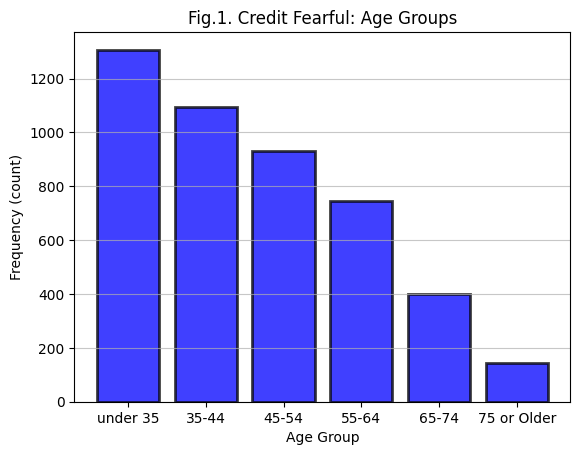

In [ ]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
plt.bar(age_cl_value_counts.index, age_cl_value_counts.values, color='blue', edgecolor='black', linewidth=2, alpha=0.75)

# Add labels and title to the chart
plt.xlabel("Age Group")
plt.ylabel("Frequency (count)")
plt.title("Fig.1. Credit Fearful: Age Groups")

# Add gridlines to the chart
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Show the chart
plt.show()

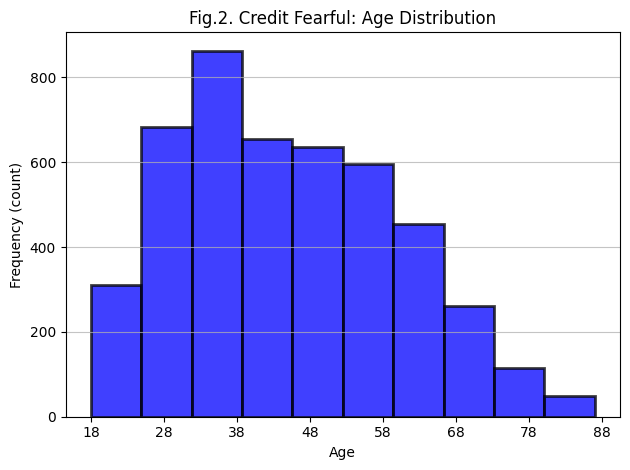

In [ ]:

# Plot histogram of "AGE"
n, bins, patches = plt.hist(df_fear["AGE"], bins=10, color='blue', edgecolor='black', linewidth=2, alpha=0.75)

# Add transparency to the bars
for patch in patches:
    patch.set_facecolor("blue")
    #patch.set_alpha(0.5)

plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Fig.2. Credit Fearful: Age Distribution")
plt.xticks(np.arange(min(df_fear["AGE"]), max(df_fear["AGE"])+10, 10))

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show();

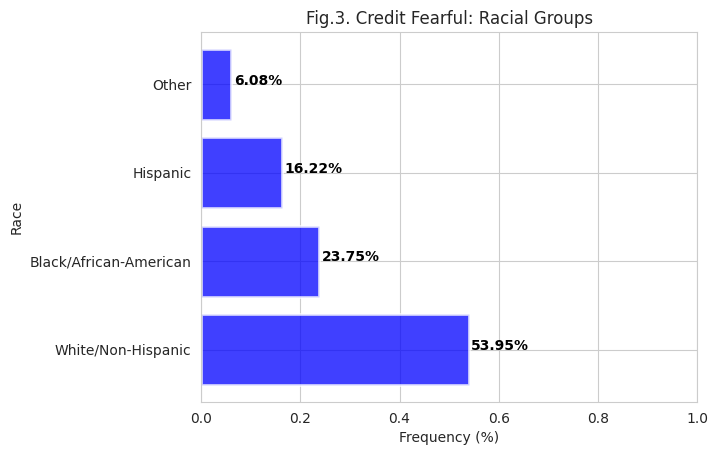

In [ ]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)

race_value_counts = race.value_counts(normalize=True)

sns.set_style("whitegrid")

# Create bar chart of race_value_counts
plt.barh(race_value_counts.index, race_value_counts.values, color='blue', linewidth=2, alpha=0.75)
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Fig.3. Credit Fearful: Racial Groups")

# Add labels to the bars
for i, v in enumerate(race_value_counts.values):
    plt.text(v + 0.005, i, str(round(v * 100, 2)) + "%", color='black', fontweight='bold')

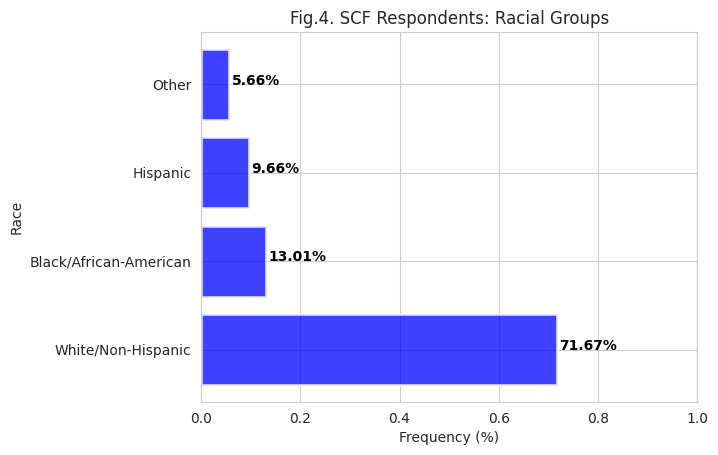

In [ ]:

race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df["RACE"].replace(race_dict)

race_value_counts = race.value_counts(normalize=True)

sns.set_style("whitegrid")

# Create bar chart of race_value_counts
plt.barh(race_value_counts.index, race_value_counts.values, color='blue', linewidth=2, alpha=0.75)
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Fig.4. SCF Respondents: Racial Groups")

# Add labels to the bars
for i, v in enumerate(race_value_counts.values):
    plt.text(v + 0.005, i, str(round(v * 100, 2)) + "%", color='black', fontweight='bold')


### Income

Do individuals with lower incomes worry about credit denial, or is it a concern primarily for those with higher incomes? To determine this, we must compare the entire dataset with our subgroup based on the "INCCAT" feature, which measures income percentile groups. To present the results, we will create a side-by-side bar chart.

In [ ]:
from locale import normalize
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename("frequency")
    .to_frame()
    .reset_index()



)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


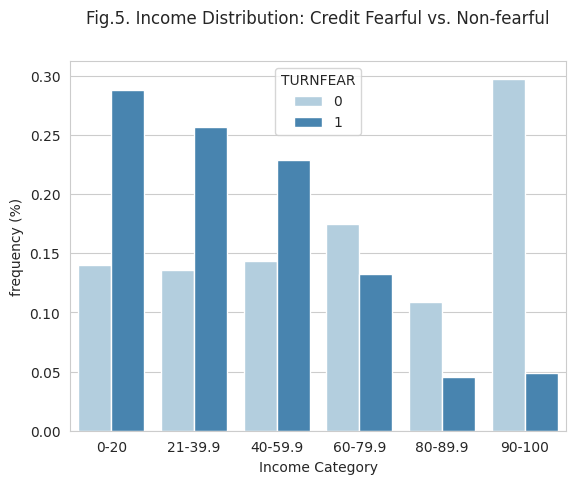

In [ ]:
import matplotlib.pyplot as plt

sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=inccat_dict.values(),
    palette="Blues",
    
)

plt.xlabel("Income Category")
plt.ylabel("frequency (%)")
plt.title("Fig.5. Income Distribution: Credit Fearful vs. Non-fearful", y=1.08)
plt.show()

### Assets

The correlation coefficient for "ASSET" and "HOUSES" in the whole dataset.

In [ ]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


SCF: Asset Houses Correlation: 0.5198273544779252


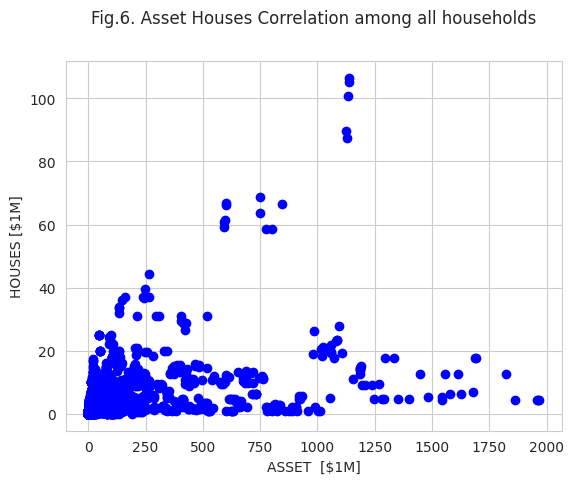

In [ ]:

# Calculate the correlation between ASSET and HOUSES
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

# Plot the scatter plot with different colors for different correlations
if asset_house_corr > 0.8:
    color = 'red'
elif asset_house_corr > 0.5:
    color = 'blue'
else:
    color = 'green'
    
plt.scatter(df["ASSET"]/1e6, df["HOUSES"]/1e6, color=color)
plt.xlabel("ASSET  [$1M]")
plt.ylabel("HOUSES [$1M]")
plt.title("Fig.6. Asset Houses Correlation among all households", y=1.08)
plt.show()


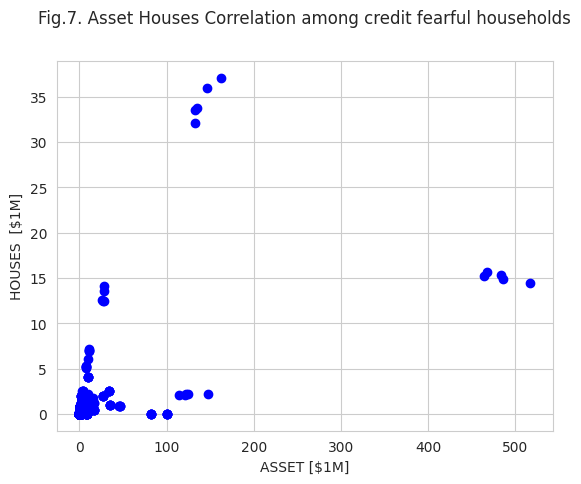

In [ ]:
# Plot the scatter plot with different colors for different correlations
if asset_house_corr > 0.8:
    color = 'red'
elif asset_house_corr > 0.5:
    color = 'blue'
else:
    color = 'green'
    
plt.scatter(df_fear["ASSET"]/1e6, df_fear["HOUSES"]/1e6, color=color)
plt.xlabel("ASSET [$1M]")
plt.ylabel("HOUSES  [$1M]")
plt.title("Fig.7. Asset Houses Correlation among credit fearful households", y=1.08)
plt.show()

Correlation matrix using df, considering only the columns "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".

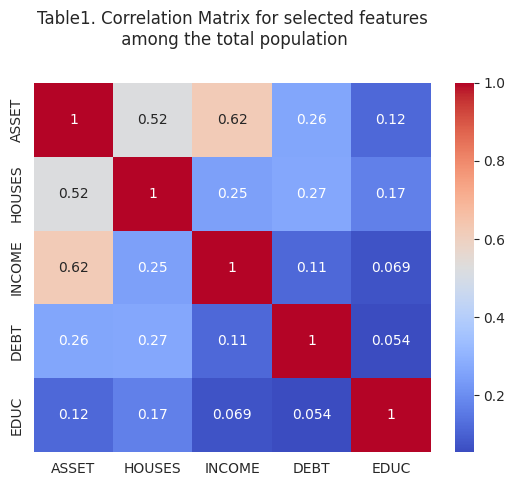

In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Table1. Correlation Matrix for selected features\n among the total population", y=1.08) 

plt.show()

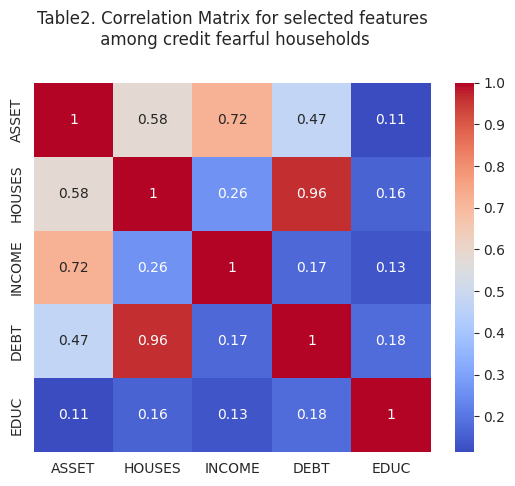

In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df_fear[cols].corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Table2. Correlation Matrix for selected features\n among credit fearful households", y=1.08) 

plt.show()

### Education



In [ ]:

inccat_educ = {

   -1:"No School",
    1:"Elementary School",
    2:"5th or 6th grade",
    3:"7th or 8th grade",
    4:"9th grade",
    5:"10th grade",
    6:"11th grade",
    7:"12th and no diploma",
    8:"HSD or equivalent",
    9:"some college, no degree",
    10:"AA or AS/occupation prog",
    11:"AA or AS/academic prog",
    12:"Bachelor's degree",
    13:"Master's degree",
    14:"Doctorate or professional",
    
    
}

df_educ = (
    df["EDUC"]
    .replace(inccat_educ)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize =True)
    .rename("frequency")
    .to_frame()
    .reset_index()


)

df_educ



,TURNFEAR,EDUC,frequency
0,0,Bachelor's degree,0.257481
1,0,HSD or equivalent,0.192029
2,0,Master's degree,0.149823
3,0,"some college, no degree",0.129833
4,0,Doctorate or professional,0.096117
5,0,AA or AS/occupation prog,0.051150
6,0,AA or AS/academic prog,0.046492
7,0,12th and no diploma,0.019578
8,0,9th grade,0.012035
9,0,11th grade,0.011953


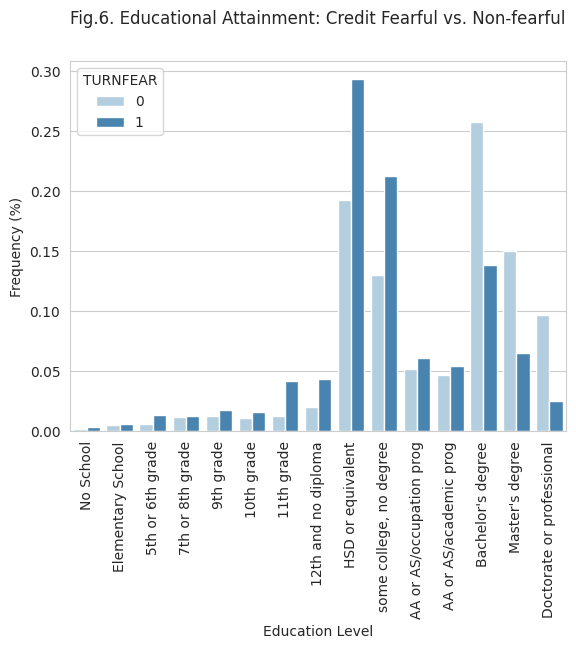

In [ ]:

sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data=df_educ,
    order=inccat_educ.values(),
    palette="Blues",
    
)
plt.xticks(rotation=90)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Fig.6. Educational Attainment: Credit Fearful vs. Non-fearful", y=1.08);

The "best" inertia is 0, and our score is pretty far from that. Does that mean our model is "bad?" Not necessarily. Inertia is a measurement of distance (like mean absolute error from Project 2). This means that the unit of measurement for inertia depends on the unit of measurement of our x- and y-axes. And since "DEBT" and "HOUSES" are measured in tens of millions of dollars, it's not surprising that inertia is so large.

However, it would be helpful to have metric that was easier to interpret, and that's where silhouette score comes in. Silhouette score measures the distance between different clusters. It ranges from -1 (the worst) to 1 (the best), so it's easier to interpret than inertia. WQU WorldQuant University Applied Data Science Lab QQQQ

### Clustering with Multiple Features

One of the persistent issues observed in the dataset is the inclusion of outliers in the form of ultra-wealthy households. In response, the focus will be shifted towards families with a net worth below $2 million.

DataFrame of households whose net worth is less than $2 million and that have been turned down for credit or feared being denied credit in the past 5 years 

In [ ]:
mask2 = df_fear["NETWORTH"] <2e6

df_fear2=df_fear[mask2]

In [ ]:
df_fear2.shape

(4418, 351)

Explore
In this lesson, we want to make clusters using more than two features, but which of the 351 features should we choose? Often times, this decision will be made for you. For example, a stakeholder could give you a list of the features that are most important to them. If you don't have that limitation, though, another way to choose the best features for clustering is to determine which numerical features have the largest variance. That's what we'll do here.

In [ ]:
# Calculate variance, get 10 largest features
top_ten_var = df_fear2.var().sort_values().tail(10)

top_ten_var

PLOAN1      1.140894e+10
ACTBUS      1.251892e+10
BUS         1.256643e+10
KGTOTAL     1.346475e+10
DEBT        1.848252e+10
NHNFIN      2.254163e+10
HOUSES      2.388459e+10
NETWORTH    4.847029e+10
NFIN        5.713939e+10
ASSET       8.303967e+10
dtype: float64

Task 6.3.3: Use plotly express to create a horizontal bar chart of top_ten_var. Be sure to label your x-axis "Variance", the y-axis "Feature", and use the title "SCF: High Variance Features".

In [ ]:
# Create horizontal bar chart of `top_ten_var`
fig = px.bar(
    x=top_ten_var,
    y=top_ten_var.index,
    title= "SCF: High Variance Features"



)

fig.update_layout(xaxis_title="Variance", yaxis_title="Feature")


fig.show()

One thing that we've seen throughout this project is that many of the wealth indicators are highly skewed, with a few outlier households having enormous wealth. Those outliers can affect our measure of variance. Let's see if that's the case with one of the features from top_five_var.


During our calculation, we performed a trimming process by excluding the top and bottom 10% of observations. Subsequently, I generated a Series named "top_ten_trim_var" which consists of the 10 features exhibiting the highest variance.

In [ ]:
top_five_trim_var = df_fear2.apply(trimmed_var, limits=(0.1, 0.1)).sort_values().tail(5)

fig = px.bar(
    x=top_five_trim_var,
    y=top_five_trim_var.index,
    title= "Fig.7. SCF: High Variance Features"
)

#fig.update_traces(marker_color='darkblue')
fig.update_layout(
    xaxis_title="Trimmed Variance", 
    yaxis_title="Feature",
    title_x=0.5,
    title_font=dict(size=14),
    
)
fig.show()

The list below displays the high_var_cols, which includes the names of the top five features with the highest trimmed variance.

In [ ]:
high_var_cols = top_five_trim_var.tail(5).index.to_list()
high_var_cols

['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

#Split
Now that we've gotten our data to a place where we can use it, we can follow the steps we've used before to build a model, starting with a feature matrix.

The below feature matrix X shows the five columns in high_var_cols.

In [ ]:
X =df_fear2[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,12200.0,-6710.0,0.0,3900.0,5490.0
6,12600.0,-4710.0,0.0,6300.0,7890.0
7,15300.0,-8115.0,0.0,5600.0,7185.0
8,14100.0,-2510.0,0.0,10000.0,11590.0
9,15400.0,-5715.0,0.0,8100.0,9685.0


#Build Model
##Iterate
The dataset had a scaling issue with the features, affecting data clustering. To address this, a standardization strategy was employed, normalizing variables onto a common scale. This approach aimed to resolve the scaling problem and improve subsequent analysis.

In [ ]:
# X_summary = X.aggregate(["mean", "std"]).astype(int)
# X_summary

Creating a StandardScaler transformer.

In [ ]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns = X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.445075,-0.377486,-0.48231,-0.474583,-0.498377
1,-0.442132,-0.368401,-0.48231,-0.464541,-0.490047
2,-0.422270,-0.383868,-0.48231,-0.467470,-0.492494
3,-0.431097,-0.358407,-0.48231,-0.449061,-0.477206
4,-0.421534,-0.372966,-0.48231,-0.457010,-0.483818


As you can see, all five of the features use the same scale now. But just to make sure, let's take a look at their mean and standard deviation.

In [ ]:
# X_scaled_summary = X_scaled.aggregate(["mean", "std"]).astype(int)
# X_scaled_summary

And that's what it should look like. Remember, standardization takes all the features and scales them so that they all have a mean of 0 and a standard deviation of 1.

Now that all of our data is on the same scale, we can commence creating clusters. We must determine the appropriate number of clusters to use.

By employing a loop, a K-Means model is constructed and trained, encompassing a range of n_clusters from 2 to 12 (inclusive). The model incorporates a StandardScaler to ensure optimal performance. Throughout the training process, the inertia is calculated and appended to the inertia_errors list for each model iteration. Additionally, the silhouette score is computed and added to the silhouette_scores list, providing valuable insights for evaluation purposes.

In [ ]:
from pandas.core.common import random_state
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
  # Build model
  model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state= 42))
  # Train model
  model.fit(X)
  # Calculate inertia
  inertia_errors.append(model.named_steps["kmeans"].inertia_)
  # Calculate silhouette scores
  silhouette_scores.append(
      silhouette_score(X, model.named_steps["kmeans"].labels_ )
  )



print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Inertia: [11028.058082607175, 7190.526303575358, 5924.997726868039]

Silhouette Scores: [0.7464502937083215, 0.7044601307791996, 0.6962653079183132]


In this step, we will utilize Plotly Express to create a line plot that illustrates the values of inertia_errors as they vary with n_clusters.

To determine the best number for inertia, you can use the "elbow method" or "knee method." This involves plotting the inertia values for different numbers of clusters and identifying the point where the inertia begins to level off or stabilize. This point is often referred to as the "elbow" or "knee" and represents a balance between minimizing inertia and avoiding overfitting.

The best K number according to below chart is 4 or 5.





In [ ]:
import plotly.express as px

fig = px.line(x=n_clusters, y=inertia_errors, title="Fig.8. K-Means Model: Inertia vs Number of Clusters")

fig.update_layout(
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Inertia",
    title_x=0.5,
    title_font=dict(size=14),

    legend=dict(title=dict(font=dict(size=12))),
    xaxis=dict(
        tickmode='linear',
        dtick=1
    )

)

fig.show()

In this step, we will utilize Plotly Express to create a line plot that illustrates the values of silhouette_scores as they vary with n_clusters.

below chart shows the best k should be 3 or 4 but in Inertia shows to us 4 (privous chart) then we are going to chose k = 4 

In [ ]:
import plotly.express as px

fig = px.line(x=list(n_clusters), y=silhouette_scores, title="Fig.9. K-Means Model: Silhouette Score vs Number of Clusters")

fig.update_layout(
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Silhouette Score",
    title_x=0.5,
    title_font=dict(size=16),
    legend=dict(title=dict(font=dict(size=12))),
    xaxis=dict(
        tickmode='linear',
        tickvals=list(n_clusters)
    )
)

fig.show()


After realizing that 4 is the best cluster number now we can build and train a new k-means model named final_model.


In [ ]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters= 4, random_state=42 )
)

final_model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

Then with below code we exctracting the labels that in our final_model created during training and assign them to the variable labels.

In [ ]:
labels = final_model.named_steps["kmeans"].labels_
print(labels[:5])


[0 0 0 0 0]


Now we are using the above labels to create a data frame that contains the mean values in X for each of the clusters in our final model.

We create a centroid for our four clusters by using the above labels.

In [ ]:
xgb = X.groupby(labels).mean().astype(int)
xgb

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,26551,13676,13745,27226,40227
1,218112,174713,257403,330588,392826
2,116160,965764,264339,780061,1081924
3,732937,760397,826136,1276227,1493335


By using plotly express we created a side-by-side bar chart from xgb that shows the mean of the features in X for each of the clusters.



Interpret of below chart:

Cluster 0: This cluster represents households with relatively low values across all features. It suggests that these households have lower levels of debt, net worth, house value, financial investments, and total assets compared to the other clusters. It may indicate a group of financially conservative or less affluent households.

Cluster 1: This cluster represents households with moderate values for all features. The values for DEBT, NETWORTH, HOUSES, NFIN, and ASSET fall between the lowest and highest values observed in the dataset. These households can be considered as having average financial standing in terms of debt, net worth, house value, financial investments, and total assets.

Cluster 2: This cluster represents households with higher values for most features, particularly in NETWORTH, HOUSES, NFIN, and ASSET. It suggests that these households have relatively higher levels of wealth and asset accumulation compared to the other clusters. They may have substantial investments in housing, financial assets, and overall higher net worth.

Cluster 3: This cluster represents households with significantly high values for all features. It indicates that these households have the highest levels of debt, net worth, house value, financial investments, and total assets among all the clusters. They likely have substantial financial resources, potentially indicating a group of affluent or wealthy households.

In [ ]:
fig = px.bar(
    xgb,
    barmode="group",
    title= "Fig.10. Mean Household Finances by Cluster"

)

# fig.update_layout(xaxis_title="Cluster", yaxis_title ="Value [$]")


fig.update_layout(
    xaxis_title="Cluster",
    yaxis_title="Value [$]",
    title_x=0.5,
    title_font=dict(size=16),

    legend=dict(title=dict(font=dict(size=12)))
)




fig.show()

Task 6.3.19: Create a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca. The columns of X_pca should be named "PC1" and "PC2".

In [ ]:
# Instantiate transformer
pca = PCA(n_components= 2 , random_state=42)


# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4418, 2)


,PC1,PC2
0,-221525.424530,-22052.273003
1,-217775.100722,-22851.358068
2,-219519.642175,-19023.646333
3,-212195.720367,-22957.107039
4,-215540.507551,-20259.749306


Task 6.3.20: Use plotly express to create a scatter plot of X_pca using seaborn. Be sure to color the data points using the labels generated by your final_model. Label the x-axis "PC1", the y-axis "PC2", and use the title "PCA Representation of Clusters".

In [ ]:
# labels.astype(str)

In [ ]:
import plotly.graph_objects as go

# Create scatter plot of `PC2` vs `PC1`
fig = go.Figure()

# Add scatter trace for each cluster
for cluster in set(labels):
    cluster_data = X_pca[labels == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data["PC1"],
        y=cluster_data["PC2"],
        mode="markers",
        marker=dict(color=cluster, size=5),
        name=f"Cluster {cluster}"
    ))

# Add orange stars for separation
for cluster in set(labels):
    cluster_data = X_pca[labels == cluster]
    centroid = cluster_data.mean()
    fig.add_trace(go.Scatter(
        x=[centroid["PC1"]],
        y=[centroid["PC2"]],
        mode="markers+text",
        marker=dict(color="orange", symbol="star", size=35),
        text=[f"<b>{cluster}</b>"],
        textfont=dict(size=13, color="red"),
        textposition="middle center",
        showlegend=False
    ))

# Update layout and show plot
fig.update_layout(
    title="Fig.11. PCA Representation of Clusters",
    xaxis_title="PC1",
    yaxis_title="PC2",
    title_x=0.5,
    title_font=dict(size=16),
    legend=dict(title=dict(font=dict(size=12)))
)

fig.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
